<a href="https://colab.research.google.com/github/ertgrulyksk/Lifestyle/blob/main/Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [2]:
train = pd.read_csv('healthy_lifestyle_city_2021.csv')

In [3]:
train.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [4]:
train['Cost of a bottle of water(City)'] = train['Cost of a bottle of water(City)'].replace(to_replace ='£', value = '', regex = True)

In [5]:
train['Obesity levels(Country)'] = train['Obesity levels(Country)'].replace(to_replace ='%', value = '', regex = True)

In [6]:
train['Cost of a monthly gym membership(City)'] = train['Cost of a monthly gym membership(City)'].replace(to_replace ='£', value = '', regex = True)

In [7]:
train=train.drop(['Rank'],axis=1)

In [8]:
train = train.replace('-', np.nan)

In [9]:
train.dtypes

City                                       object
Sunshine hours(City)                       object
Cost of a bottle of water(City)            object
Obesity levels(Country)                    object
Life expectancy(years) (Country)          float64
Pollution(Index score) (City)              object
Annual avg. hours worked                   object
Happiness levels(Country)                 float64
Outdoor activities(City)                    int64
Number of take out places(City)             int64
Cost of a monthly gym membership(City)     object
dtype: object

In [10]:
train['Sunshine hours(City)']=train['Sunshine hours(City)'].map(float)

In [11]:
train['Cost of a bottle of water(City)']=train['Cost of a bottle of water(City)'].map(float)
train['Obesity levels(Country)']=train['Obesity levels(Country)'].map(float)
train['Pollution(Index score) (City)']=train['Pollution(Index score) (City)'].map(float)
train['Annual avg. hours worked']=train['Annual avg. hours worked'].map(float)
train['Cost of a monthly gym membership(City)']=train['Cost of a monthly gym membership(City)'].map(float)

In [12]:
train['Annual avg. hours worked'].unique()

array([1434., 1712., 1501., 1452., 1380., 1540., 1644., 1386., 1686.,
       1670.,   nan, 1967., 1557., 1898., 1832., 1779., 1772., 1583.,
       1505., 1538., 1718., 1965., 2137.])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Sunshine hours(City)                    43 non-null     float64
 2   Cost of a bottle of water(City)         44 non-null     float64
 3   Obesity levels(Country)                 44 non-null     float64
 4   Life expectancy(years) (Country)        44 non-null     float64
 5   Pollution(Index score) (City)           43 non-null     float64
 6   Annual avg. hours worked                33 non-null     float64
 7   Happiness levels(Country)               44 non-null     float64
 8   Outdoor activities(City)                44 non-null     int64  
 9   Number of take out places(City)         44 non-null     int64  
 10  Cost of a monthly gym membership(City)  44 non-null     float64


In [14]:
train.isnull().sum()

City                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunshine hours(City),43.0,2245.860465,567.403719,1405.00,1798.500,2066.000,2629.000,3542.00
Cost of a bottle of water(City),44.0,1.173409,0.718642,0.15,0.570,1.195,1.600,3.20
Obesity levels(Country),44.0,21.925000,10.195670,3.90,19.500,22.300,29.000,36.20
Life expectancy(years) (Country),44.0,78.175000,5.304370,56.30,75.400,80.400,81.800,83.20
Pollution(Index score) (City),43.0,51.122326,21.856190,13.08,34.355,52.640,66.630,91.74
Annual avg. hours worked,33.0,1672.909091,179.626933,1380.00,1540.000,1686.000,1779.000,2137.00
Happiness levels(Country),44.0,6.435000,0.991202,3.57,5.870,6.900,7.175,7.80
Outdoor activities(City),44.0,213.977273,127.190297,23.00,125.250,189.500,288.250,585.00
Number of take out places(City),44.0,1443.113636,1388.803270,250.00,548.000,998.000,1674.250,6417.00
Cost of a monthly gym membership(City),44.0,40.420000,15.006457,16.07,31.310,37.330,47.210,73.11


In [16]:
train.columns

Index(['City', 'Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [17]:
columns=['Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)']

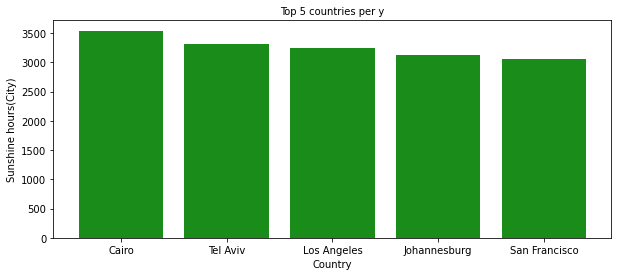

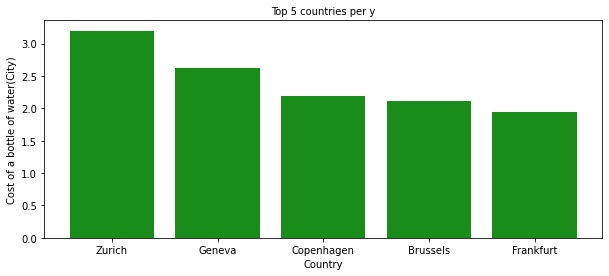

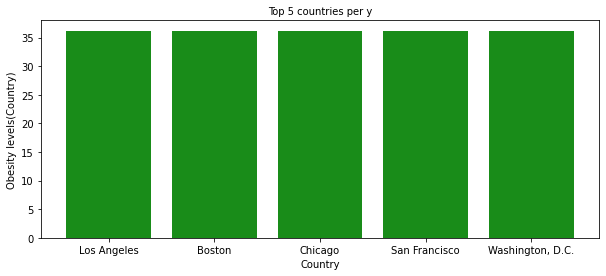

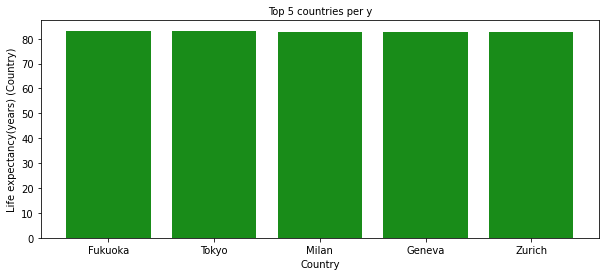

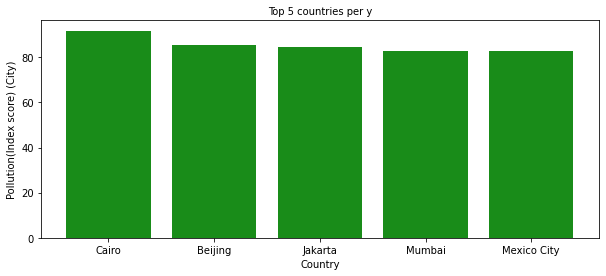

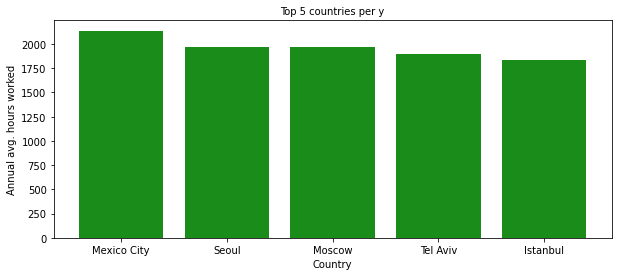

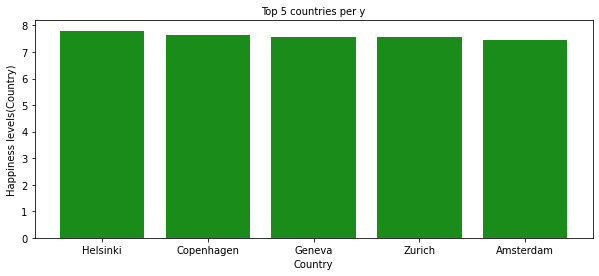

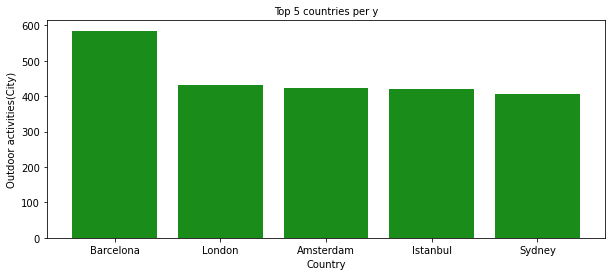

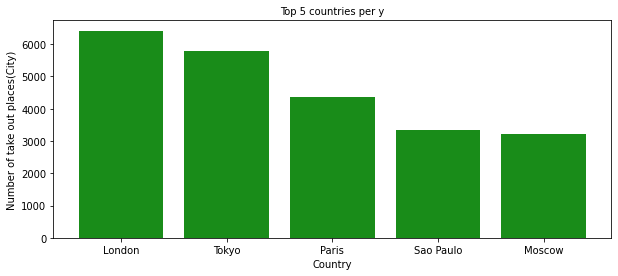

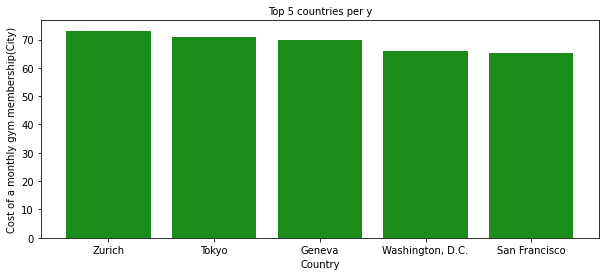

In [18]:
#The nlargest() method returns a specified number of rows, starting at the top after 
#sorting the DataFrame by the highest value for a specified column.
for column in columns:
  top10 = train.nlargest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['City'], top10[column],color='green',alpha=0.9)
  plt.ylabel(column, fontsize = 10)
  plt.xlabel("Country", fontsize = 10)
  plt.title("Top 5 countries per y", fontsize = 10)

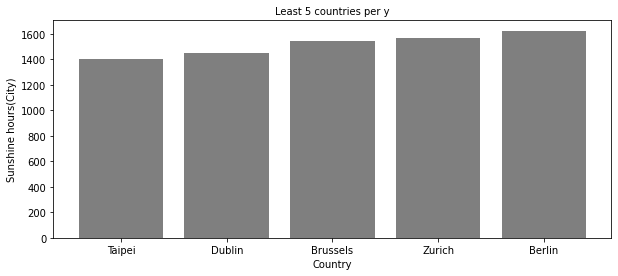

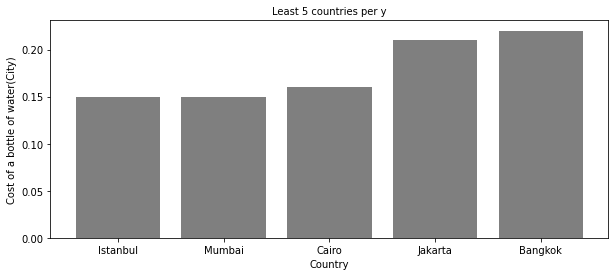

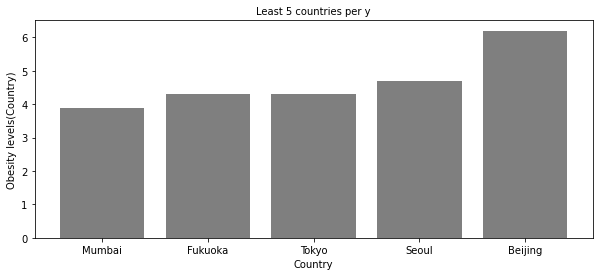

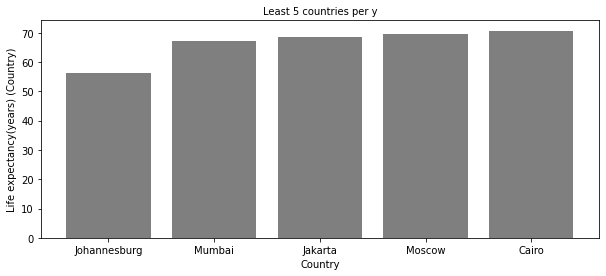

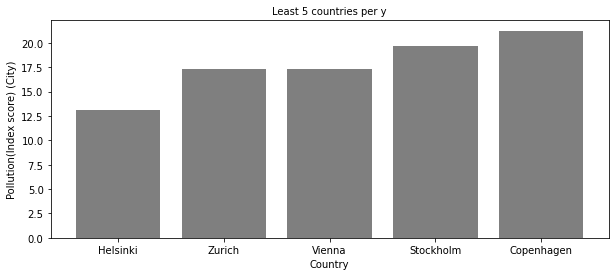

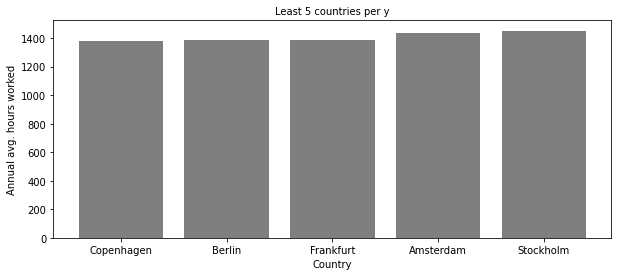

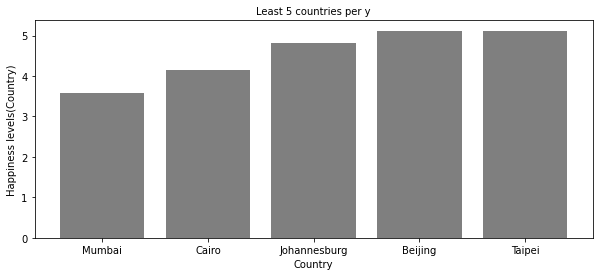

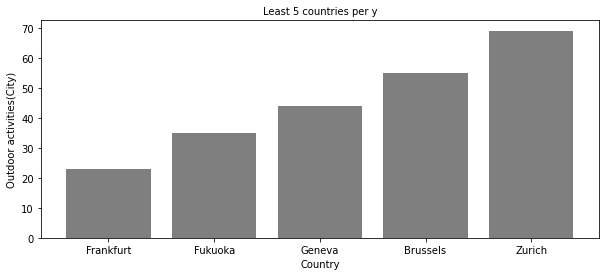

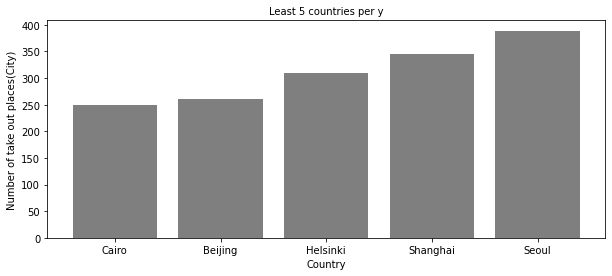

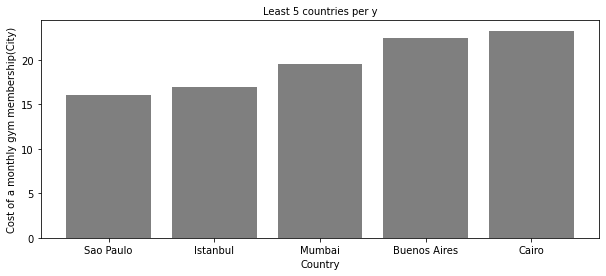

In [19]:
for column in columns:
  top10 = train.nsmallest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['City'], top10[column],color='black',alpha=0.5)
  plt.ylabel(column, fontsize = 10)
  plt.xlabel("Country", fontsize = 10)
  plt.title("Least 5 countries per y", fontsize = 10)

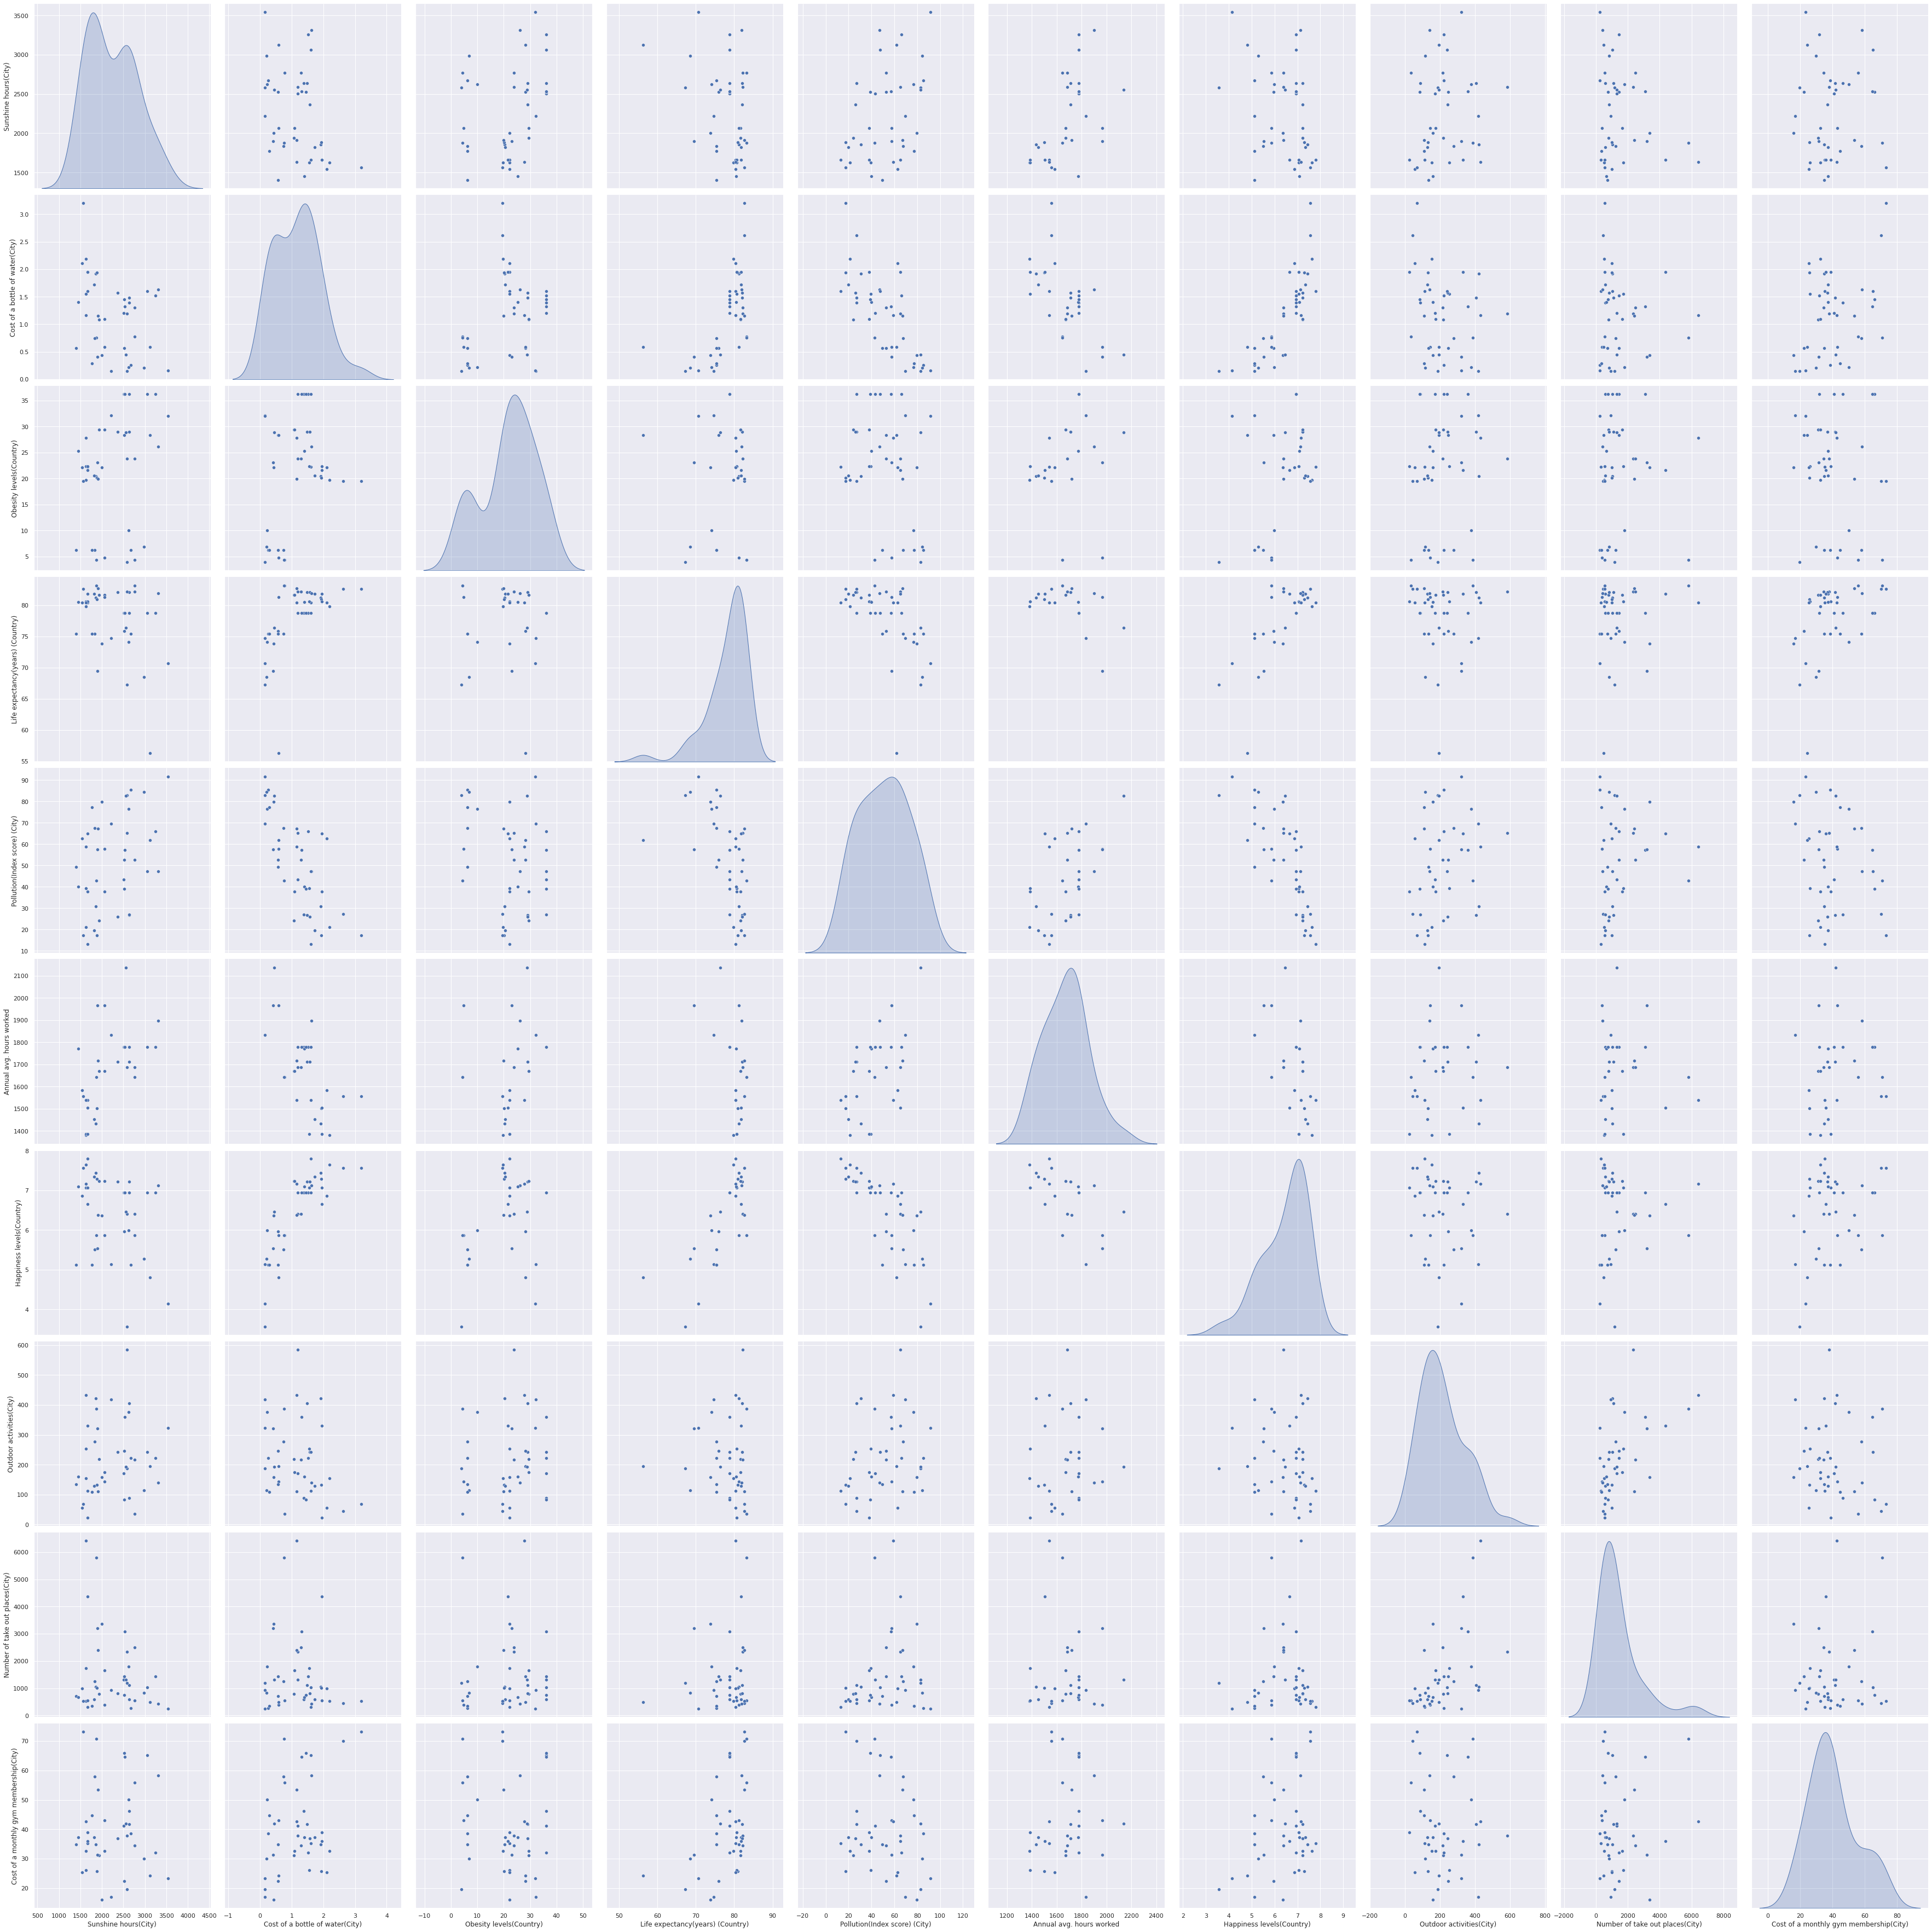

In [20]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [21]:
train.shape

(44, 11)

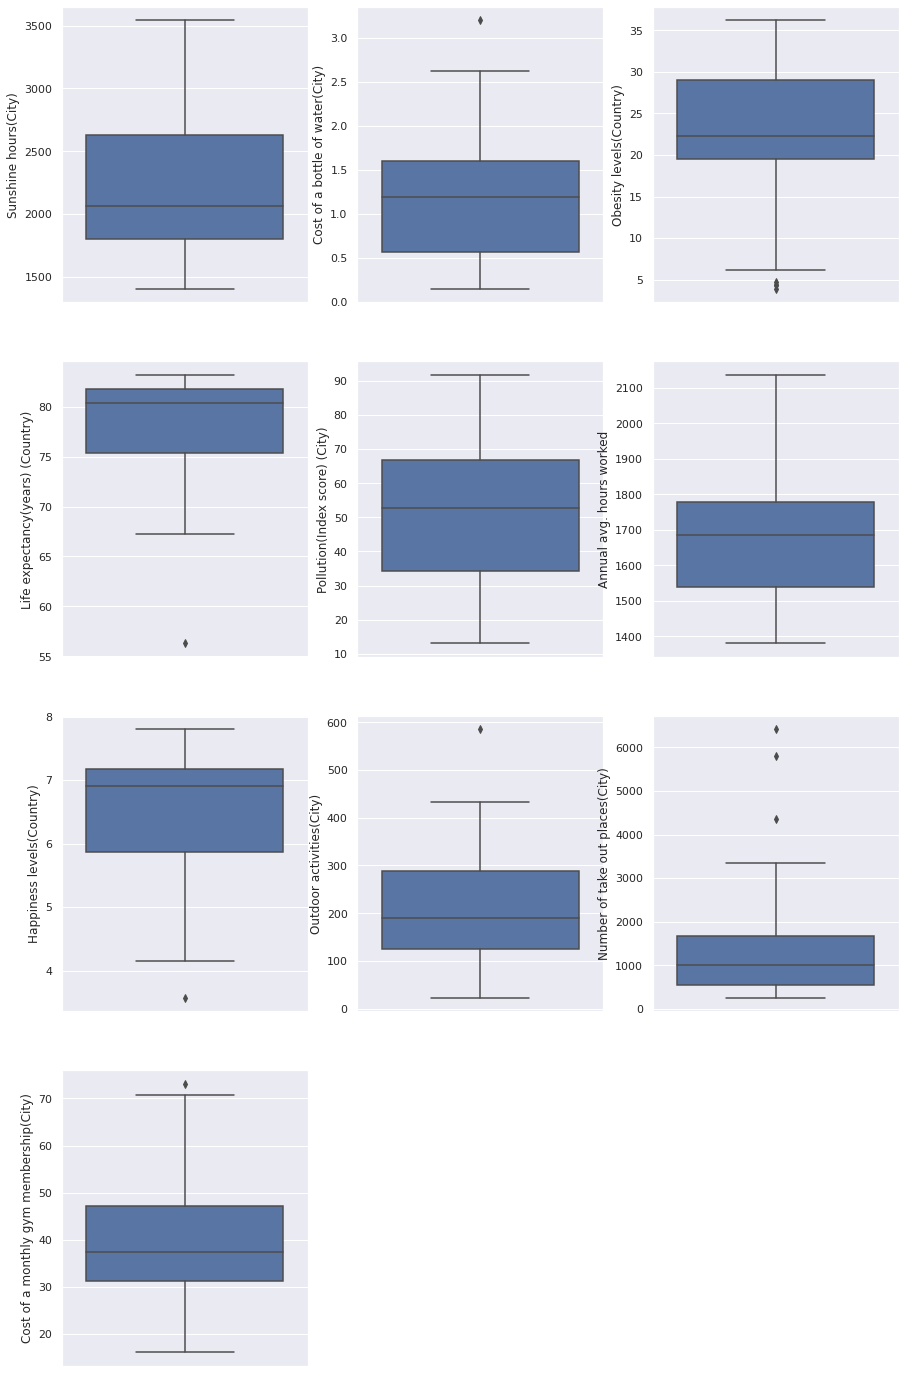

In [22]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(4,3,i)
    sns.boxplot(y=train[feature])
    i+=1

In [23]:
train.head(10)

,City,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53
5,Helsinki,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113,309,35.23
6,Fukuoka,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87
7,Berlin,1626.0,1.55,22.3,80.6,39.41,1386.0,7.07,254,1729,26.11
8,Barcelona,2591.0,1.19,23.8,82.2,65.19,1686.0,6.40,585,2344,37.80
9,Vancouver,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218,788,31.04


In [24]:
Asia=train.loc[[6,11,12,16,17,23,28,30,31]]

In [25]:
Asia

,City,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
6,Fukuoka,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87
11,Beijing,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62
12,Bangkok,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03
16,Jakarta,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94
17,Seoul,2066.0,0.59,4.7,81.3,57.82,1967.0,5.87,144,389,43.03
23,Taipei,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76
28,Tokyo,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82
30,Hong Kong,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95
31,Shanghai,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68


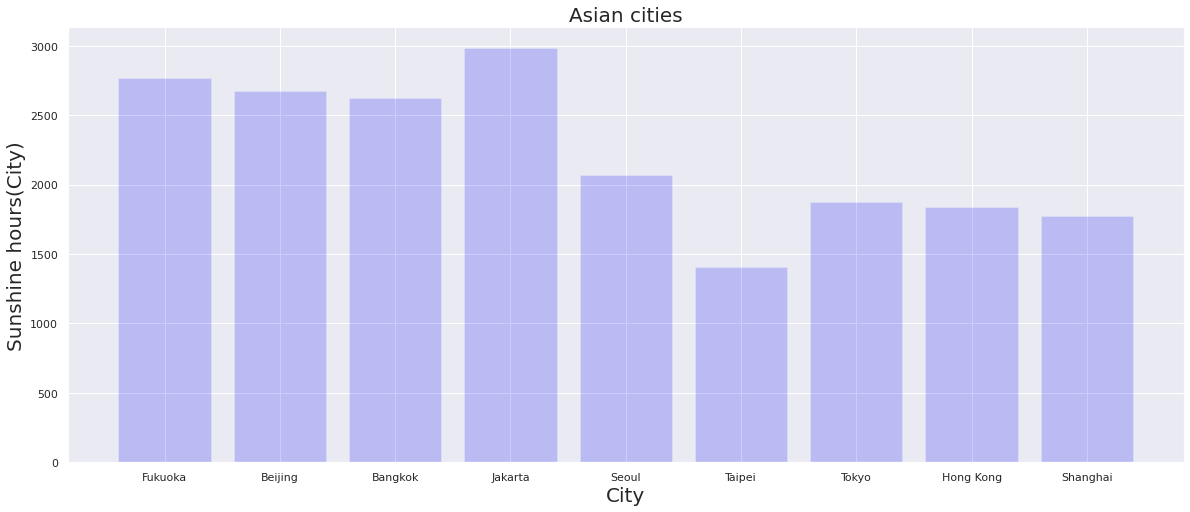

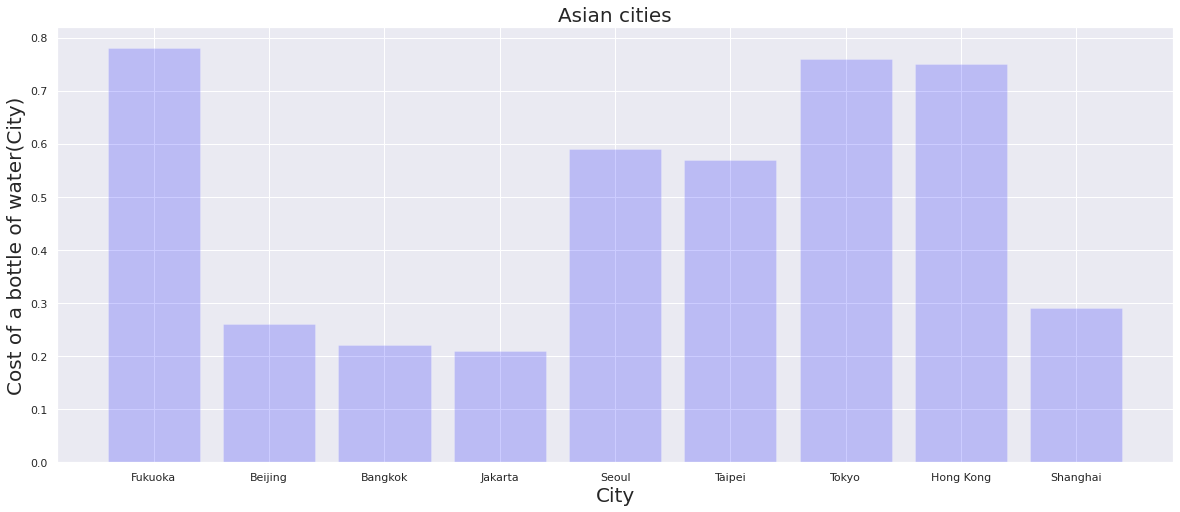

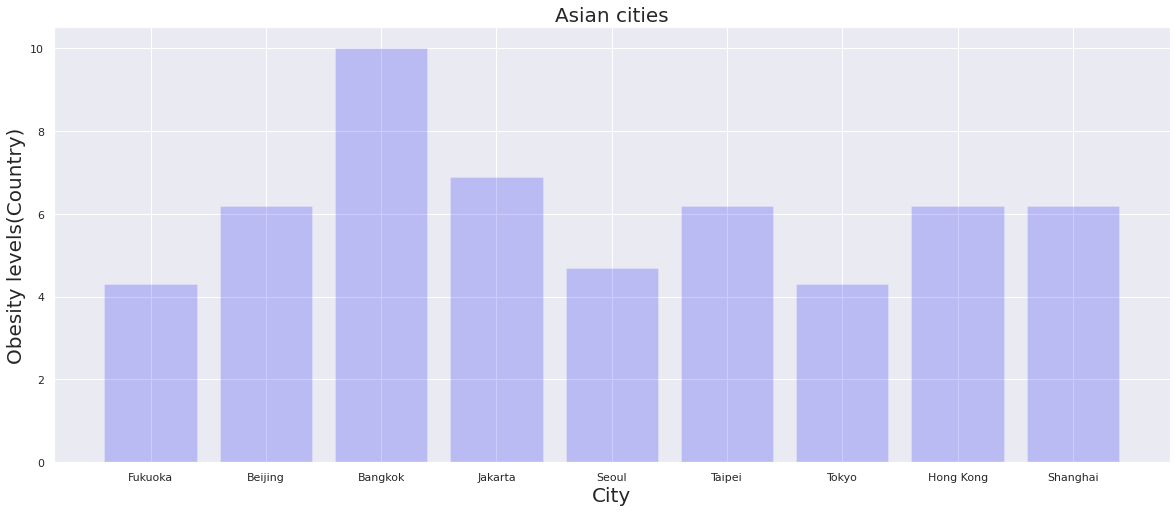

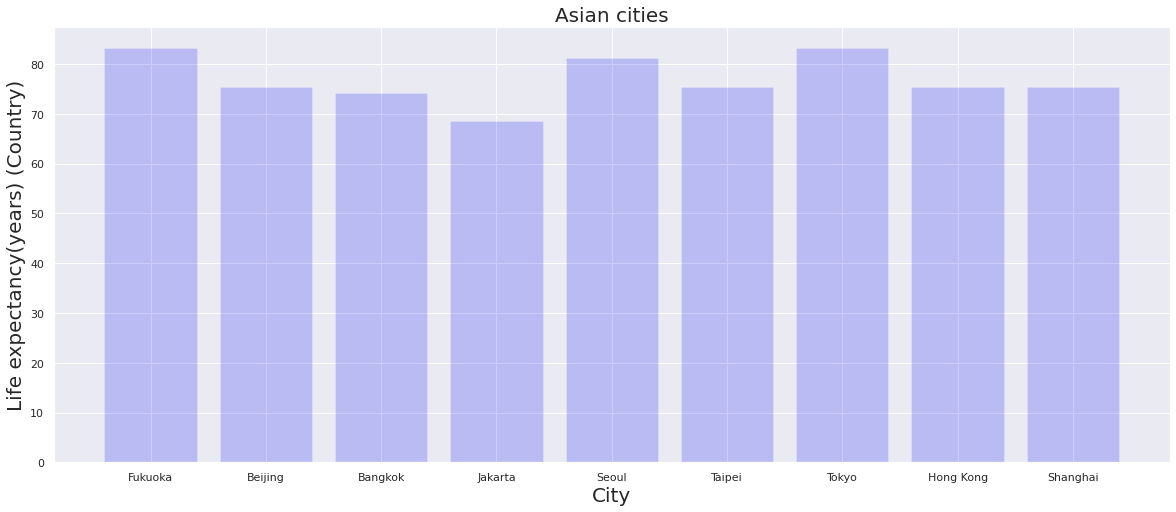

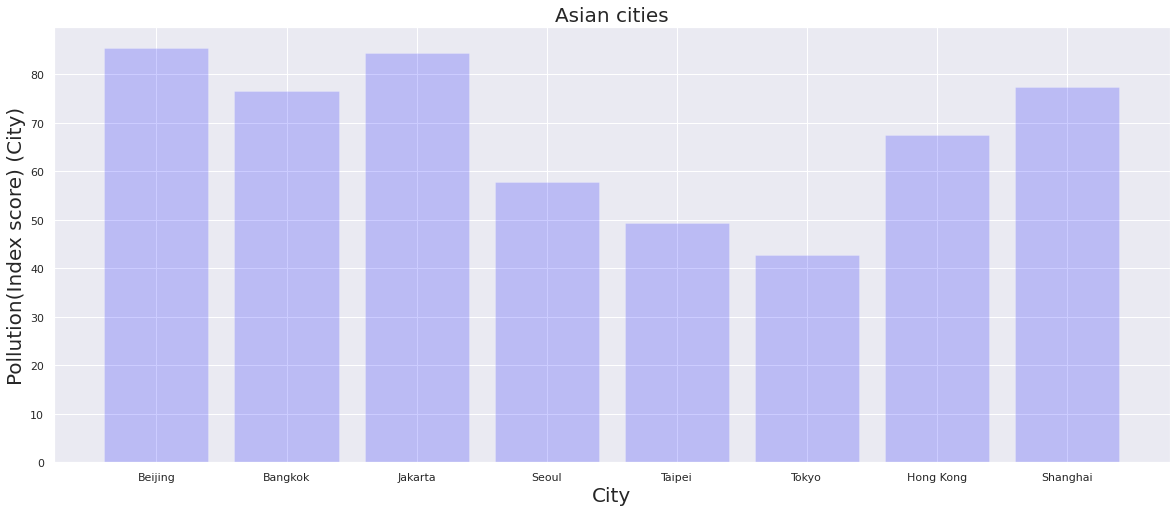

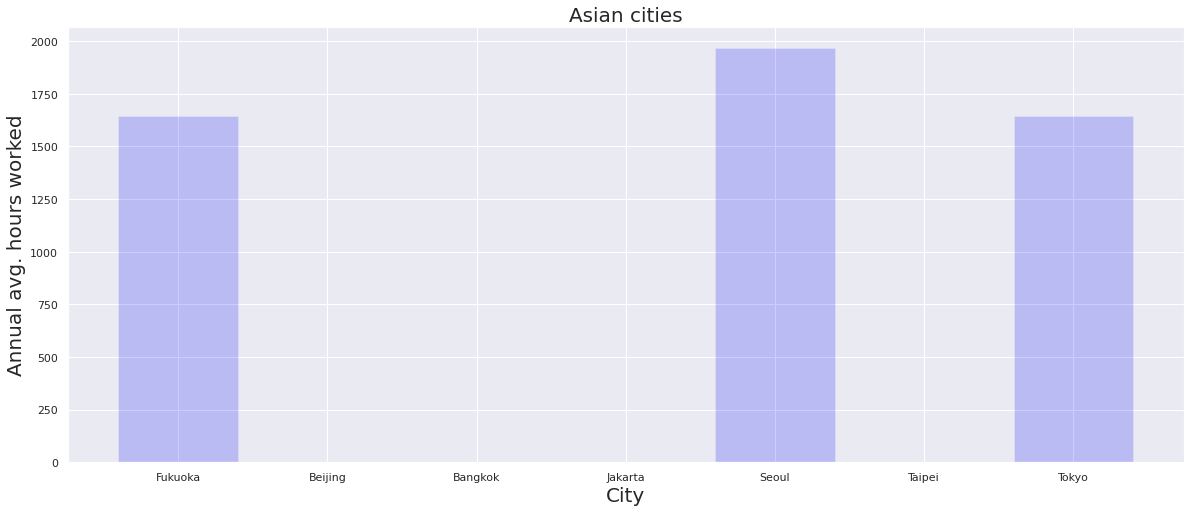

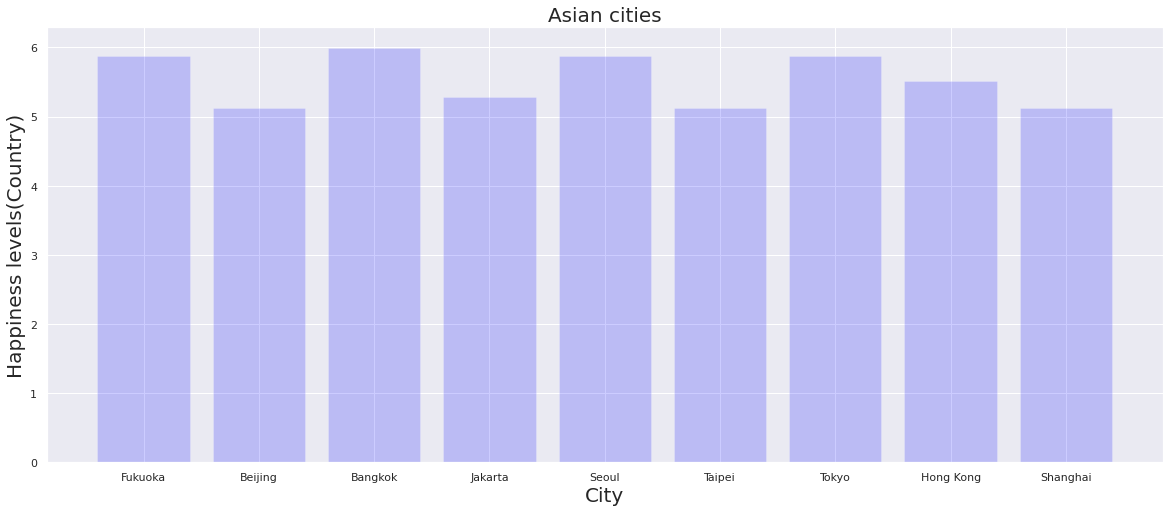

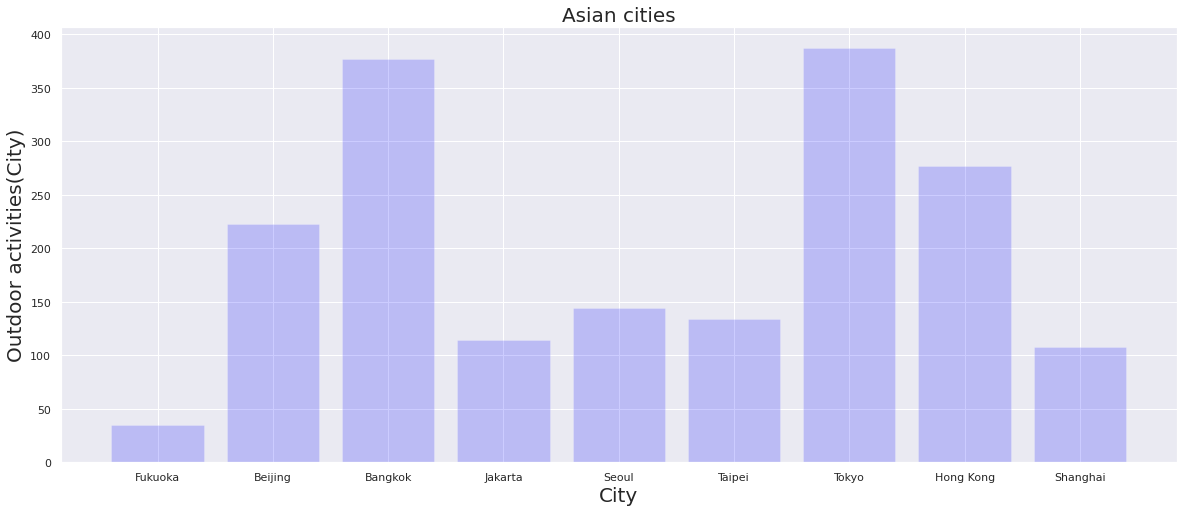

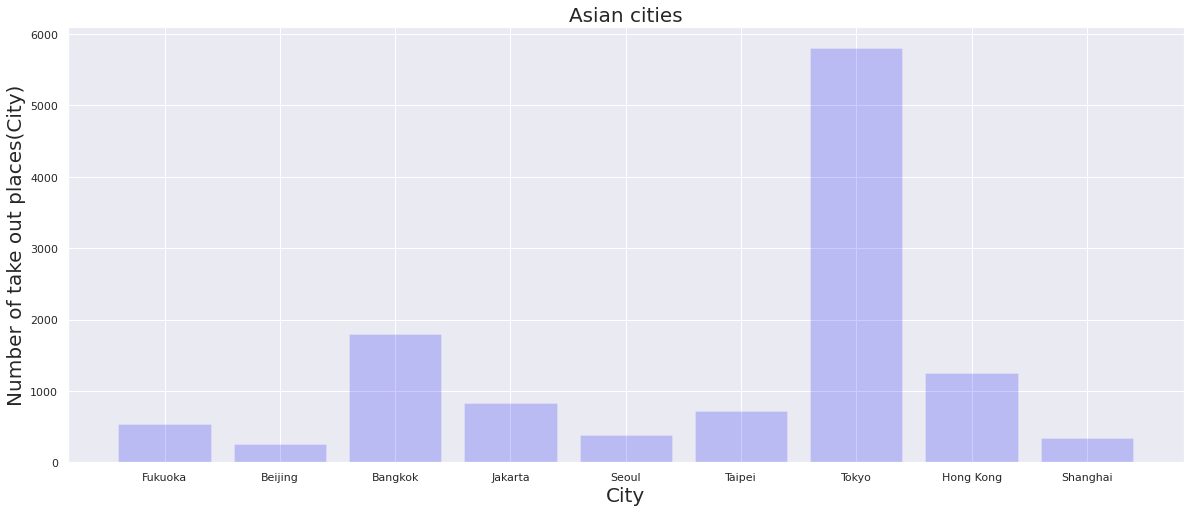

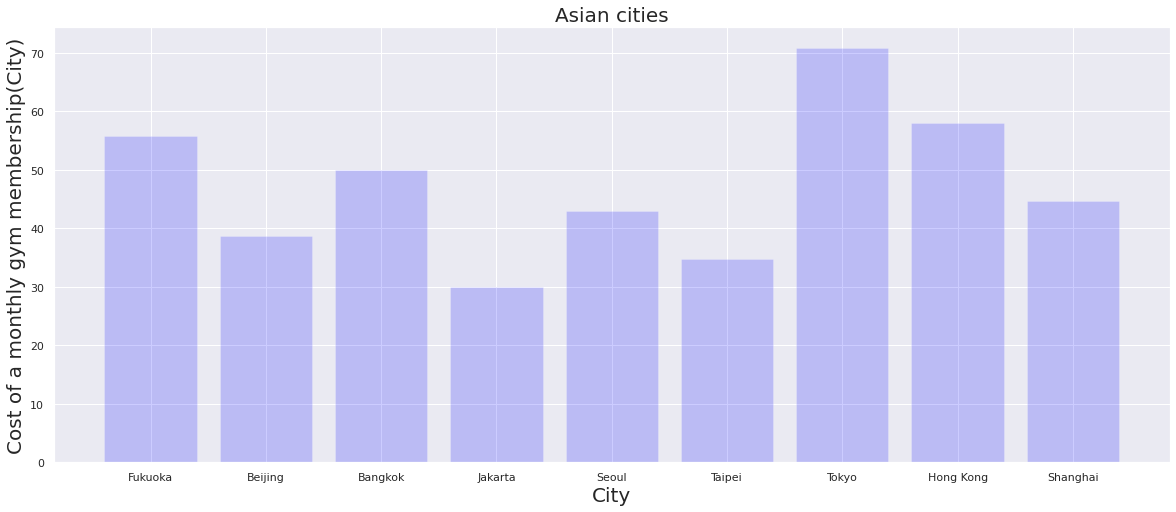

In [26]:
for column in columns:
  plt.figure(figsize=(20,8))
  plt.bar(Asia['City'], Asia[column],color='blue',alpha=0.2)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("City", fontsize = 20)
  plt.title("Asian cities", fontsize = 20)

In [27]:
train=train.set_index('City')

In [28]:
train.columns

Index(['Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [29]:
correlation = train.corr()
print(correlation['Happiness levels(Country)'].sort_values(ascending = False),'\n')

Happiness levels(Country)                 1.000000
Cost of a bottle of water(City)           0.813159
Life expectancy(years) (Country)          0.724587
Obesity levels(Country)                   0.446399
Cost of a monthly gym membership(City)    0.297425
Number of take out places(City)           0.033116
Outdoor activities(City)                 -0.137612
Sunshine hours(City)                     -0.334141
Annual avg. hours worked                 -0.531554
Pollution(Index score) (City)            -0.765902
Name: Happiness levels(Country), dtype: float64 



Index(['Happiness levels(Country)', 'Cost of a bottle of water(City)',
       'Life expectancy(years) (Country)', 'Obesity levels(Country)',
       'Cost of a monthly gym membership(City)',
       'Number of take out places(City)', 'Outdoor activities(City)'],
      dtype='object')


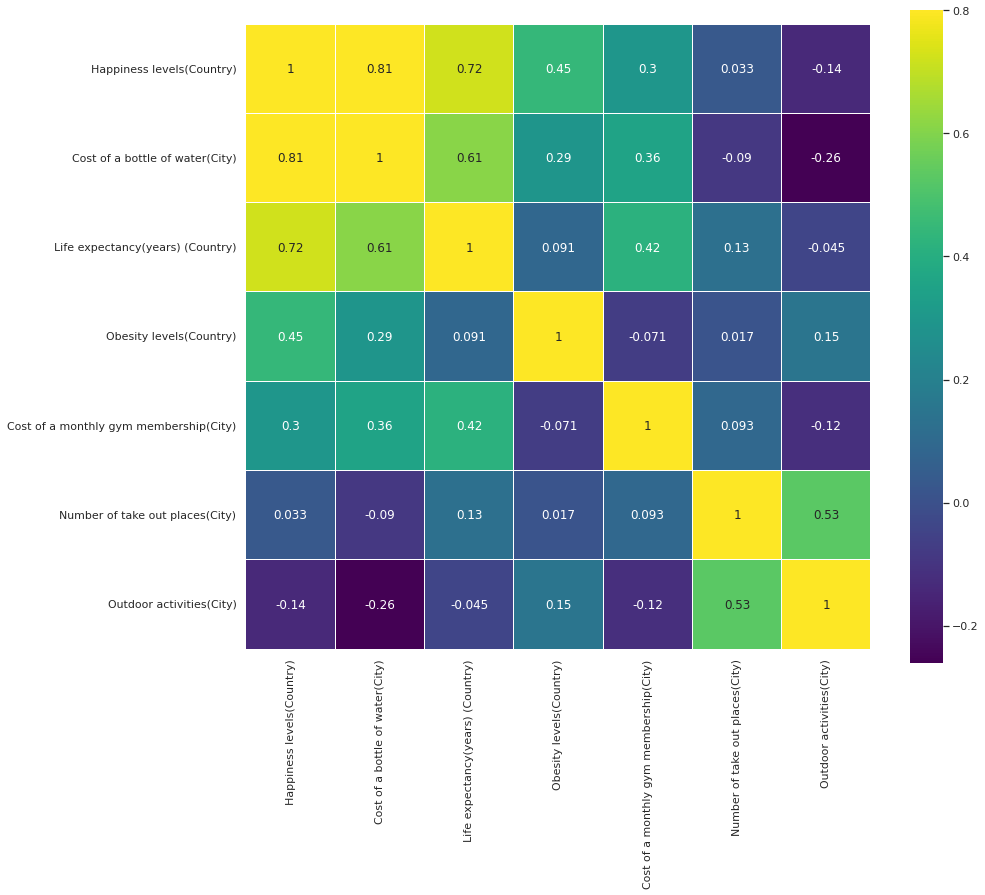

In [30]:
k= 7
cols = correlation.nlargest(k,'Happiness levels(Country)')['Happiness levels(Country)'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [31]:
y=train['Happiness levels(Country)']
train=train.drop(['Happiness levels(Country)'],axis=1)

In [32]:
train.fillna(train.mean(),inplace=True)

In [33]:
train.isnull().sum()

Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [34]:
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [35]:
X_train, X_test, y_train, y_test=train_test_split(train,y,test_size=0.1,random_state=42)

In [36]:
from sklearn.metrics import r2_score
models = [RandomForestRegressor(), LinearRegression(),KNeighborsRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'R2: {r2_score(y_test, y_pred)}')
    
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 0.8000189359999981
MAE: 0.5590799999999991
R2: 0.6112215634743539
------------------------------ 

model: LinearRegression()
RMSE: 0.43561833507810227
MAE: 0.5742798418530717
R2: 0.7883062417492952
------------------------------ 

model: KNeighborsRegressor()
RMSE: 2.54064
MAE: 1.1887999999999999
R2: -0.23465333447372316
------------------------------ 

